In [1]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pickle
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import math

In [2]:
from data_loader import DataLoader
loader = DataLoader()

/opt/miniconda3/envs/thesis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/thesis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


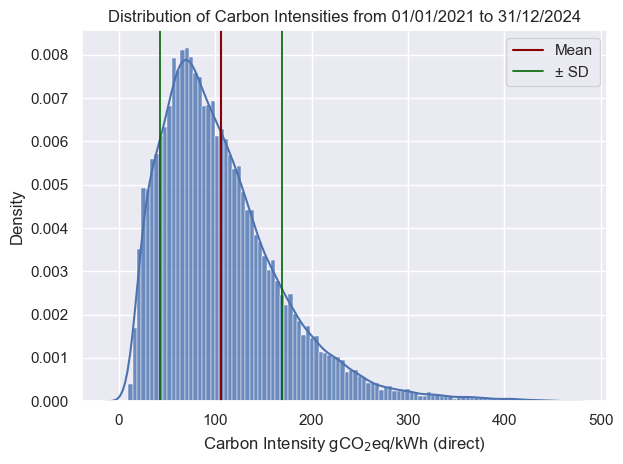

In [3]:
loader.plot_hist()

In [4]:
# loader.data
unique = len(np.unique(loader.data['carbon_intensity']))
print(len(loader.data))
norm_unique = len(np.unique(loader.data['normalized']))

decimals = [1,2,3,4,5,6]
for d in decimals:
    rounded_unique = len(np.unique(np.round(loader.data['normalized'], d)))
    print(f"{d} decimal makes length = {rounded_unique}")
    if rounded_unique != norm_unique:
        print(f"{d} decimals is not okay")
    else:
        print(f"{d} is okay")

35064
1 decimal makes length = 11
1 decimals is not okay
2 decimal makes length = 100
2 decimals is not okay
3 decimal makes length = 880
3 decimals is not okay
4 decimal makes length = 5885
4 decimals is not okay
5 decimal makes length = 16891
5 is okay
6 decimal makes length = 16891
6 is okay


In [5]:
data = loader.data['normalized']
max_data = len(data)


splitter = TimeSeriesSplit(n_splits=10)
for fold, (train, test) in enumerate(splitter.split(data)):
    print(fold)
    print(f'min train = {train[0]}, max train = {train[-1]}: %{len(train)/max_data}')
    print(f'min test = {test[0]}, max test = {test[-1]}: %{len(test)/max_data}')
    print(len(train) + len(test))

print('---')
train_size = 0.9
split_idx = int(len(data) * train_size)
train_idx = data.iloc[0:split_idx]
test_idx = data.iloc[split_idx:]

train_keys = train_idx.keys()
train_vals = train_idx.values

test_keys = test_idx.keys()
test_vals = test_idx.values
print(f'min_train = {train_keys[0]}, max_train = {train_keys[-1]}, train size = {len(train_idx)}: ${len(train_idx)/max_data}')
print(f'min_test = {test_keys[0]}, max_test = {test_keys[-1]}, test size = {len(test_idx)}: ${len(test_idx)/max_data}')
# print(f'test size = {len(test_idx)}: ${len(test_idx)/max_data}')



0
min train = 0, max train = 3193: %0.09109057723020762
min test = 3194, max test = 6380: %0.09089094227697923
6381
1
min train = 0, max train = 6380: %0.18198151950718686
min test = 6381, max test = 9567: %0.09089094227697923
9568
2
min train = 0, max train = 9567: %0.2728724617841661
min test = 9568, max test = 12754: %0.09089094227697923
12755
3
min train = 0, max train = 12754: %0.3637634040611453
min test = 12755, max test = 15941: %0.09089094227697923
15942
4
min train = 0, max train = 15941: %0.45465434633812457
min test = 15942, max test = 19128: %0.09089094227697923
19129
5
min train = 0, max train = 19128: %0.5455452886151038
min test = 19129, max test = 22315: %0.09089094227697923
22316
6
min train = 0, max train = 22315: %0.636436230892083
min test = 22316, max test = 25502: %0.09089094227697923
25503
7
min train = 0, max train = 25502: %0.7273271731690623
min test = 25503, max test = 28689: %0.09089094227697923
28690
8
min train = 0, max train = 28689: %0.8182181154460415


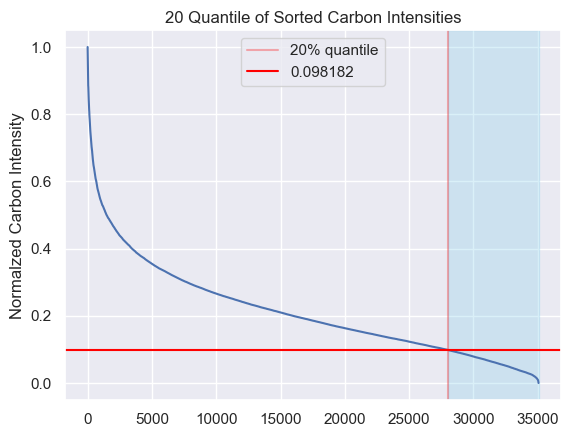

In [6]:
loader.plot_quantile_ranges(5)